# Aula 01: Python, Pandas e Pharmacia

Nessa imersão nós vamos mergulhar no universo da biologia e da biotecnologia e explorar uma base de dados da área.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#fonte dos dados
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

#leitura do arquivo
dados = pd.read_csv(url_dados, compression = 'zip')
#cabeçalho do df - primeiras cinco observações
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
#tamanho do df
dados.shape

(23814, 877)

### **DESAFIO 01**: Os dados não parecem balanceados

O grupo de controle aparentemente é menor, contudo o grupo de tratamento passa por diferentes especificações, como a variável 'tempo', 'dose' e 'droga' formando subgrupos para serem analisados em relação ao controle. Abaixo, podemos ver a partir das culturas tratadas, quantas foram destinadas para avaliação de cada variável.

In [ ]:
#número de observações destinadas ao tratamento e ao controle
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
#segue a lógica da linha anterior, contudo, de forma proporcional
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [ ]:
#para identificar esses subgrupos de tratamento, podemos criar novos dataframes
tratamento = dados[dados['tratamento'] == 'com_droga']
tratamento.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
#número de observações tratadas conforme tempo de exposição a droga
tratamento['tempo'].value_counts()

48    7602
72    7180
24    7166
Name: tempo, dtype: int64

In [ ]:
#número de observações tratadas mediante a dose aplicada
tratamento['dose'].value_counts()

D1    11196
D2    10752
Name: dose, dtype: int64

In [ ]:
#número total de observações aplicados para cada droga. vale destacar aqui a droga '87d714366' que é aplicada em muitas culturas,
#destoando bastante das outras drogas
tratamento['droga'].value_counts()

87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
            ... 
379302187      1
dac782c74      1
8d320a8c7      1
91a585117      1
37a8319f4      1
Name: droga, Length: 3288, dtype: int64

### **DESAFIO 02**: Plotar as últimas 5 linhas da tabela

In [ ]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


### **DESAFIO 03**: Proporção das classes de tratamento
O resultado pode ser obtido através da função 'normalize' que mostra essa distribuição dos resultados, mas considerando classe do tratamento, como cada especificação da análise, podemos encontrar o percentual de análise para cada grupo tratado.


In [ ]:
#as amostras de tempo são bem divididas entre as culturas, especialmente a de 24h e 72h
tratamento['tempo'].value_counts(normalize = True)

48    0.346364
72    0.327137
24    0.326499
Name: tempo, dtype: float64

In [ ]:
#semelhante distribuição temos também quanto as doses administradas aos tratados
tratamento['dose'].value_counts(normalize = True)

D1    0.510115
D2    0.489885
Name: dose, dtype: float64

### **DESAFIO 04**: Quantas tipos de drogas foram investigados
O resultado pode ser encontrado de diferentes formas. Na célula 14, o rodapé do resultado já exibe o parâmetro Lenght, que indica os valores únicos da variável ligada ao tratamento. Na linha abaixo vemos outra fórmula, mais direta, que mostra os mesmos 3.288 tipos de drogas investigados no experimento. Se analisássemos em dados - o dataframe original - obteríamos o placebo também como droga nessa contagem.


In [ ]:
len(tratamento['droga'].unique())

3288

### **DESAFIO 05**: Procurar na documentação o método query(pandas)

Pela [documentação](https://https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) a gente vê que consegue otimizar a elaboração de dataframes para análise. Podemos criar dataframes para outras análises a partir da especificação das variáveis

In [ ]:
#criação de 3 subgrupos a partir das culturas tratadas que recebem a D1 e são analisadas em diferentes instantes de tempo
d1_24hrs = tratamento.query('dose.str.startswith("D1").values & tempo == 24')
d1_48hrs = tratamento.query('dose.str.startswith("D1").values & tempo == 48')
d1_72hrs = tratamento.query('dose.str.startswith("D1").values & tempo == 72')

In [ ]:
#número de observações do dataframe que contém apenas dados da dose 1 aplicada analisados em 24 hrs
d1_24hrs.shape

(3585, 877)

In [ ]:
#número de observações do dataframe que contém apenas dados da dose 1 aplicada analisados em 48 hrs
d1_48hrs.shape

(4011, 877)

In [ ]:
#número de observações do dataframe que contém apenas dados da dose 1 aplicada analisados em 72 hrs
d1_72hrs.shape

(3600, 877)

### **DESAFIO 06**: Renomear as colunas
Na base original, de forma automatizada, podemos retirar o hífen para que não haja erro na formação de queries.

In [ ]:
dados.columns = dados.columns.str.lower().str.replace('-', '')
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
#df apenas com dados de g0 maiores que zero
gzero = dados.query('g0 > 0')
gzero.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,-4.0360,3.6950,1.4530,0.9724,-2.4380,5.1340,-4.6600,5.7960,4.9700,1.5540,2.4790,-3.8010,-1.0230,5.3110,-0.5660,-4.4450,1.2210,1.3750,0.3932,0.3392,4.3510,5.7540,-1.6590,5.3000,5.6050,5.5320,3.7860,0.9197,1.9310,2.4870,...,-0.8904,2.0590,0.5052,0.6890,0.5340,0.5135,0.6507,0.9838,0.4532,-0.3212,0.2662,0.6864,1.6300,1.3810,0.0061,0.2908,0.2598,0.1266,-0.3526,1.1750,-1.1030,1.3650,1.0610,0.4034,1.0880,-0.4230,0.4013,0.1726,0.7464,0.9418,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.2623,-0.5500,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.3420,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


### **DESAFIO 07**: Gráficos bonitões
No DESAFIO 03, o objetivo era analisar as proporções das classes de tratamento. Utilizando o Seaborn como pacote para visualização gráfica, podemos ver o total de culturas expostas as doses 1 e 2, além do período tratado.

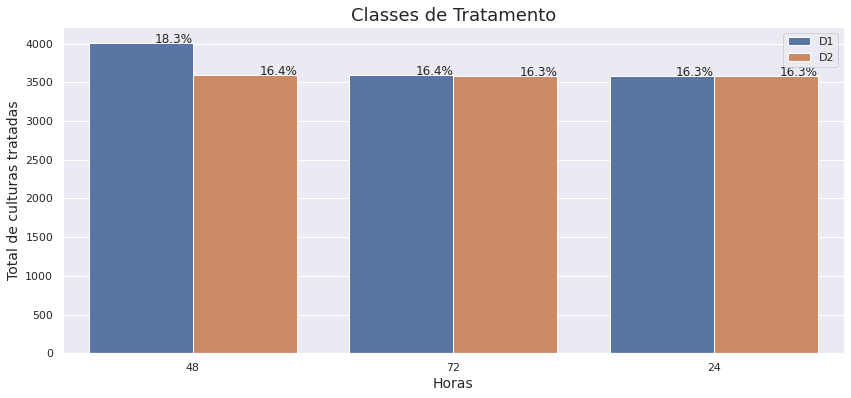

In [ ]:
sns.set()

classes = sns.countplot(data=tratamento, x='tempo', hue='dose', order=tratamento.tempo.value_counts().index)
classes.figure.set_size_inches(14,6)
classes.set_title('Classes de Tratamento', fontsize = 18)
classes.set_xlabel('Horas', fontsize = 14)
classes.set_ylabel('Total de culturas tratadas', fontsize = 14)
classes.legend(loc = 'best')

total = float(len(tratamento))
for p in classes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    classes.annotate(percentage, (x, y), ha='right')

classes


No gráfico acima conseguimos distinguir os grupos tratados pela dose aplicada e o tempo de exposição ao tratamento. Apesar de não sabermos qual droga é administrada na cultura, sabemos que as doses um e dois para o tempo de 24 e 72 horas estão balanceadas, enquanto que no tratamento de exposição por 48 horas, temos mais D1 aplicadas do que D2.

### **DESAFIO 08**: Resumo da aula
No penúltimo desafio conseguimos resumir em um gráfico como se dá a distribuição das culturas que recebem o tratamento. Apesar de serem muitas drogas administradas, 3288 no total como exposto no desafio 04, conseguimos entender como as classes de tratamento baseados em tempo e dose estão balanceadas no experimento. O pandas - um pacote bem completo para análise de dados - já oferece a possibilidade de visualização gráfica, mas teríamos que criar vários gráficos com diferentes bases para captar os números das classes tratadas. Ansioso pela aula de amanhã, pra descobir o que são todas essas 871 colunas e seus resultados rsrs

# Aula 02: Estatística, Visualização de Dados e Distribuições


In [ ]:
#renomeando variaveis
dados.rename(columns={'droga':'composto'}, inplace=True)

In [ ]:
#definindo o grupo com as 5 maiores frequencias
cod_compostos = dados['composto'].value_counts().index[0:5]
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [ ]:
#criando df para este grupo de compostos
freq_compostos = dados.query('composto in @cod_compostos')

### **DESAFIO 01**: Ordenação do gráfico
No Seaborn (importado no Desafio 07 da última aula), a função 'order' possibilita a a organização do maior para o menor a partir da frequência de culturas adminsitradas com os compostos mais utilizados neste experimento. Vale destacar, que o primeiro eixo, com 1866 culturas, trata-se do composto utilizado como placebo nas culturas de controle.

### **DESAFIO 02**: Visualização
Dentro das opções de legenda, o 'fontsize' permite alterar não só o tamanho da fonte, mas também os nomes (label) dos eixos

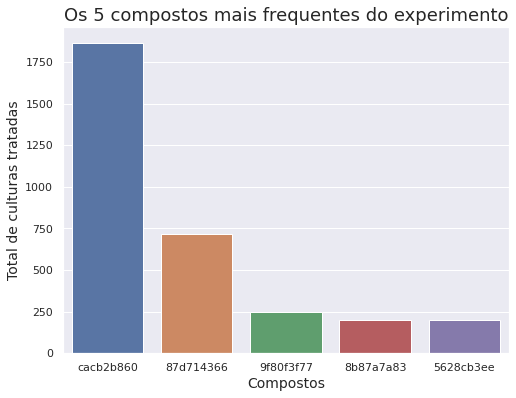

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=freq_compostos, order=freq_compostos['composto'].value_counts().index)
ax.set_title('Os 5 compostos mais frequentes do experimento', fontsize=18)
ax.set_xlabel('Compostos', fontsize = 14)
ax.set_ylabel('Total de culturas tratadas', fontsize = 14)
plt.show()

In [ ]:
print(len(dados['g0'].unique()))
print(dados['g0'].min())
print(dados['g0'].max())

14367
-5.513
10.0


In [ ]:
#o comando lista todas as 877 variáveis, logo a gente consegue identificar o primeiro e último 'g'
print(dados.columns.tolist())

['id', 'tratamento', 'tempo', 'dose', 'composto', 'g0', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18', 'g19', 'g20', 'g21', 'g22', 'g23', 'g24', 'g25', 'g26', 'g27', 'g28', 'g29', 'g30', 'g31', 'g32', 'g33', 'g34', 'g35', 'g36', 'g37', 'g38', 'g39', 'g40', 'g41', 'g42', 'g43', 'g44', 'g45', 'g46', 'g47', 'g48', 'g49', 'g50', 'g51', 'g52', 'g53', 'g54', 'g55', 'g56', 'g57', 'g58', 'g59', 'g60', 'g61', 'g62', 'g63', 'g64', 'g65', 'g66', 'g67', 'g68', 'g69', 'g70', 'g71', 'g72', 'g73', 'g74', 'g75', 'g76', 'g77', 'g78', 'g79', 'g80', 'g81', 'g82', 'g83', 'g84', 'g85', 'g86', 'g87', 'g88', 'g89', 'g90', 'g91', 'g92', 'g93', 'g94', 'g95', 'g96', 'g97', 'g98', 'g99', 'g100', 'g101', 'g102', 'g103', 'g104', 'g105', 'g106', 'g107', 'g108', 'g109', 'g110', 'g111', 'g112', 'g113', 'g114', 'g115', 'g116', 'g117', 'g118', 'g119', 'g120', 'g121', 'g122', 'g123', 'g124', 'g125', 'g126', 'g127', 'g128', 'g129', 'g130', 'g131', 'g13

In [ ]:
#dataframe apenas com as estruturas genéticas
genes = dados.loc[:,'g0':'g771']
#dataframe com as 3 primeiras análises de g(g0, g1, g2) - Desafio 06
genes_3 = dados.loc[:, 'g0':'g2']

### **DESAFIO 03**: Histogramas no Seaborn
A partir do dataframe com apenas as informações das variáveis 'g', criamos diferentes frames de visualização para as 9 primeiras variáveis. Pode-se ver que as médias sempre estão em torno do zero, diferenciando-se no range do eixo x. Inicialmente, através da visualização da distribuição dos histogramas, a gente consegue começar a fazer análises quanto a simetria. Se analisássemos a funçaõ sns.displot, poderíamos inferir também sobre a curtose da distribuição. 

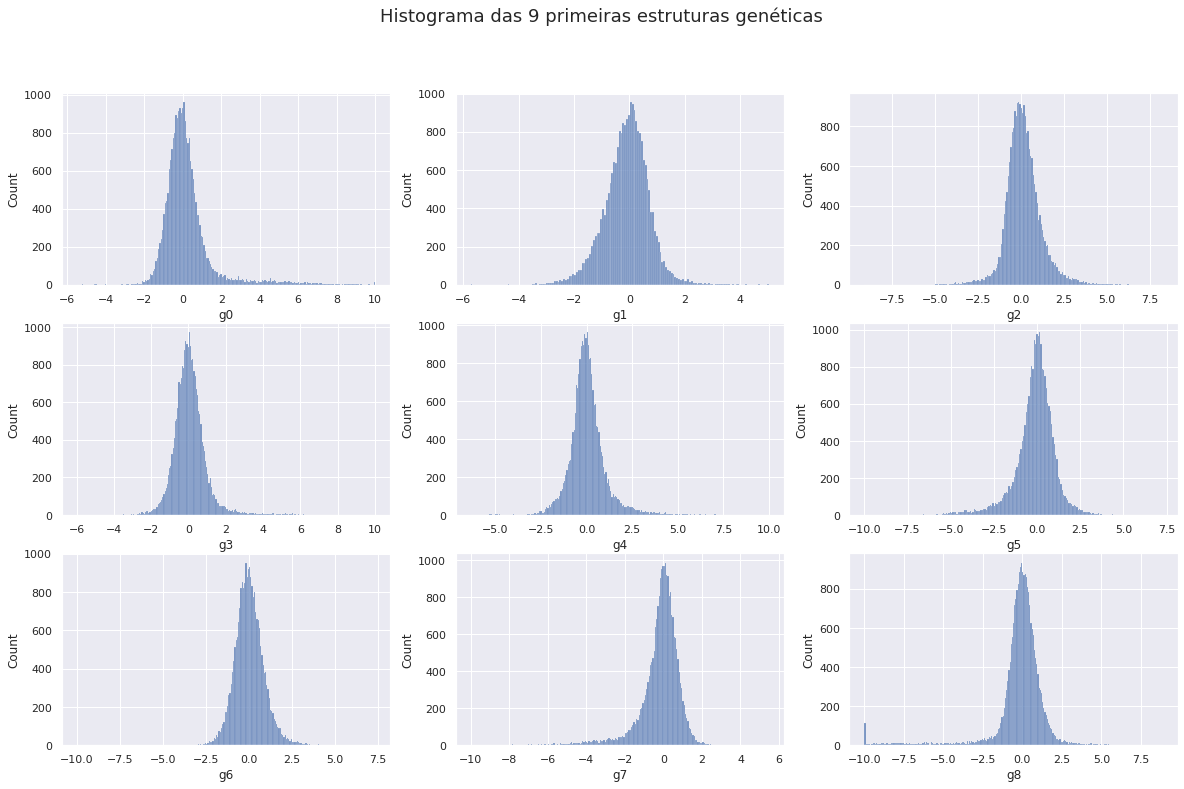

In [ ]:
#Criando figura e eixos
fig, ax = plt.subplots(3, 3, figsize=(20,12)) 

#Criando o gráfico
sns.histplot(genes['g0'], ax=ax[0,0],color='b')
sns.histplot(genes['g1'], ax=ax[0,1],color='b')
sns.histplot(genes['g2'], ax=ax[0,2],color='b')
sns.histplot(genes['g3'], ax=ax[1,0],color='b')
sns.histplot(genes['g4'], ax=ax[1,1],color='b')
sns.histplot(genes['g5'], ax=ax[1,2],color='b')
sns.histplot(genes['g6'], ax=ax[2,0],color='b')
sns.histplot(genes['g7'], ax=ax[2,1],color='b')
sns.histplot(genes['g8'], ax=ax[2,2],color='b')

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Histograma das 9 primeiras estruturas genéticas', fontsize=18)
    
#Mostrando o gráfico
plt.show()

### **DESAFIO 04**: Estatísticas Descritivas
Inicialmente a gente já percebe que o painel é balanceado, uma vez que existem 23814 informações pra todas as variáveis.
A **média** dos dados é a média simples, isto é, a razão entre a soma dos valores de cada observação e o total de observações da base;
O **desvio padrão** é a dispersão do dado observado em relação a média. Quanto mais distante de zero, mais disperso o resultado, ou seja, forte presença de *outliers* na base;
**min** e **max** apresentam o início e o final do intervalo numérico para cada variável;
Os **quartis** (25%, 50% (mediana) e 75%) são quatro grupos de distribuição em torno dos dados. Um exemplo: no g0, a mediana, mostra que metade (50%) dos resultados estão abaixo de -0.00885, enquanto que a outra metade está acima desse número. Ainda analisando a variável g0, temos que o quartil 75 (25% acima) possui resultados entre 0.525700 e 10.


In [ ]:
genes.describe().T

,count,mean,std,min,25%,50%,75%,max
g0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


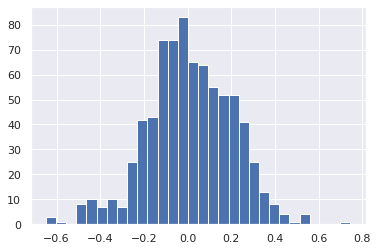

In [ ]:
#histograma dos valores médios para as 772 estruturas genéticas
genes.describe().T['mean'].hist(bins=30)

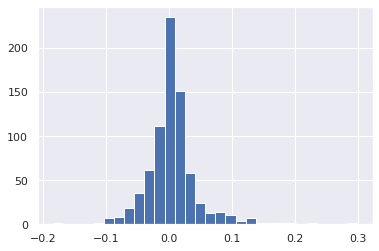

In [ ]:
#histograma da mediana. Fica nítido a quantidade de elementos que são zero (ontem o Gui tinha feito o exercício de manter na base apenas g0 > 0),
#se fizéssemos isso com toda a base, o número de observações reduziria bastante
genes.describe().T['50%'].hist(bins=30)

### **DESAFIO 05**: Tamanho das visualizações
Quanto mais nós especificarmos as variáveis na visualização gráfica, melhor a gente consegue entender os dados. No primeiro boxplot da Aula 02 a única informação que o gráfico revela é a distribuição dos resultados de g0. Analisando o gráfico, parece que há uma distribuição normal entre -2 e 2, contudo os resultados acima de 2 são mais frequentes (melhor visualizados no histograma), o que faz a reta do boxplot possuir inúmeras marcações destas observações no gráfico. O que o Thiago e a o Gui chamam de distorção, é apenas um gráfico mais comprimido, como fosse uma distorção no mapa na representação de um país. A partir do momento, como no Desafio 06, em que a gente aumenta a área de visualização e controla diferentes variáveis, essa 'distorção' ela é melhor resolvida.

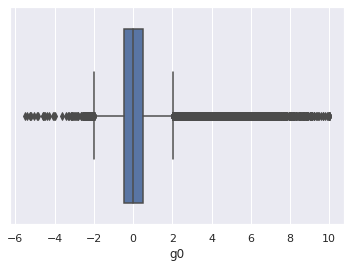

In [ ]:
sns.boxplot(x='g0', data=dados)

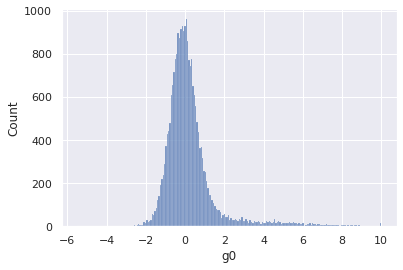

In [ ]:
sns.histplot(x='g0', data=dados)

### **DESAFIO 06**: Boxplot no Seaborn
Considerando os resultados para apenas as observações de g0, distribuídas em relação aos diferentes períodos de tratamento e distinguidos pela dose aplicada.

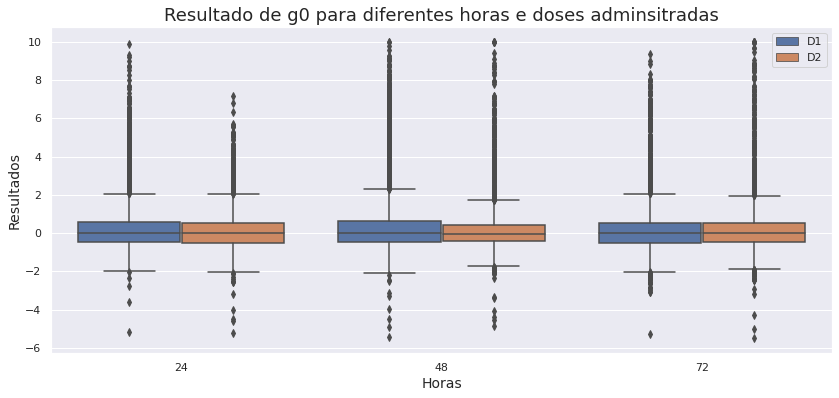

In [ ]:
ax = sns.boxplot(data=dados, y='g0', x='tempo', hue='dose')
ax.figure.set_size_inches(14,6)
ax.set_title('Resultado de g0 para diferentes horas e doses adminsitradas', fontsize = 18)
ax.set_xlabel('Horas', fontsize = 14)
ax.set_ylabel('Resultados', fontsize = 14)
ax.legend(loc = 'best')
ax

### **DESAFIO 07**: Resumo da aula
O seaborn é uma baita ferramenta gráfica no Python. Para o analista de dados, é essencial entender o que os gráficos mostram ou ainda funções como `describe` para se começar a tratar os dados. É interessante perceber que na bioinformática, o outlier apresentado no gráfico de boxplot, pode ser um resultado que se busca para um possível tratamento e não apenas uma observação destoante da base a ser excluída. 

# Aula 03: Correlação e Causalidade


In [ ]:
#possibilita criar uma tabela de frequência
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [ ]:
#tabela de frequência distinguindo as doses tratadas e de controle
#pd.crosstab([[multiindex]], [colunas])
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
#normalização dos dados de acordo com o índex, caso contrário seria normalizado pela base completa
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

### **Desafio 01**: Tabela de Frequências usando groupby()

Seguindo a mesma lógica anterior, a função groupby() agrupa os dados de dose e tempo por tipo de tratamento e retorna a mesma tabela. Utilizando do `value_counts`, ele retorna a frequência de cada observação, mas ainda poderíamos utilizar de outras funções como sum, median, mean, max, min, etc. O `normalize=True` coloca o resultado numa escala entre 0 e 1.


In [ ]:
crosstab = dados.groupby(['dose', 'tempo'])['tratamento'].value_counts(normalize=True)
crosstab.unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

### **Desafio 02**: Normalizando a coluna

Se anteriormente os dados em cada linha estavam normalizados, usando o argumento `columns`, agora nós temos que cada coluna (com_controle e com_droga) estão normalizadas

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

### **Desafio 03**: Explorar outros agregadores

De todos os argumentos que podemos explorar em nossa análise, o exemplo dado em aula foi a média, mas aqui expomos a mediana (o valor central dos resultados de g0), além dos máximos e mínimos de g0 resultantes dos experimentos. A efeito de comparação, já se destaca a diferença do comportamento das culturas de controle e tratamento em g0.


In [ ]:
#crosstab avaliando a média em torno dos resultados de g0
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [ ]:
#crosstab avaliando a mediana em torno dos resultados de g0
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='median')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.2912    0.02700
     48          -0.2145    0.01620
     72          -0.3655    0.02615
D2   24           0.0096   -0.02610
     48          -0.0506   -0.02960
     72           0.0528    0.00015

In [ ]:
#crosstab avaliando os resultados máximos de g0
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [ ]:
#crosstab avaliando os resultados mínimos de g0
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

### **Desafio 04**: Explorar a função melt()

A função melt() reorganiza o dataframe considerando variáveis identitárias e de valor. No exemplo, as variáveis dose, tempo e tratamento identificam o resultado da estrutura  genética 0 e apresenta o valor equivalente encontrado para a cultura submetida àquela condição experimental

In [ ]:
pd.melt(dados, id_vars=['dose','tempo','tratamento'], value_vars=['g0'])

,dose,tempo,tratamento,variable,value
0,D1,24,com_droga,g0,1.0620
1,D1,72,com_droga,g0,0.0743
2,D1,48,com_droga,g0,0.6280
3,D1,48,com_droga,g0,-0.5138
4,D2,72,com_droga,g0,-0.3254
...,...,...,...,...,...
23809,D2,24,com_droga,g0,0.1394
23810,D2,24,com_droga,g0,-1.3260
23811,D2,48,com_controle,g0,0.3942
23812,D1,24,com_droga,g0,0.6660


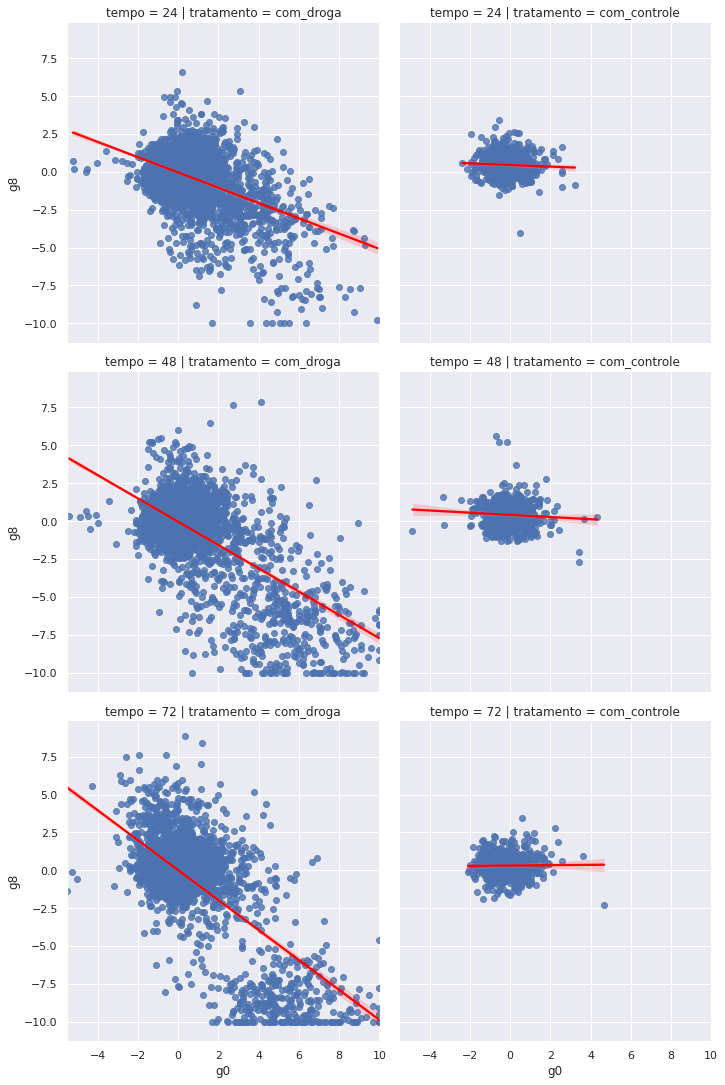

In [ ]:
sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

### **Desafio 05**: Correlação entre expressão genética e viabilidade celular

Após estabelecida a correlação entre as estruturas genéticas e viabilidade celular e utilizando de um número balanceado dessas informações em relação a quantidade de variáveis, conseguimos ver pelo mapa de calor as interações/correlações maiores e menores.

### **Desafio 06**: Código heatmap

O [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) permite a visualização da correlação de forma visual, uma vez que permite a definição de uma paleta de cores para um intervalo. Os parâmetros que podem ser embutidos vão desde o dataframe, intervalo numérico, cores utilizadas, até a inclusão dos valores.


In [ ]:
#analisando todas as variáveis em c e a mesma quantidade em g
corr = dados.corr()
corr_g_c = corr.loc['c0':, 'g0':'g100']

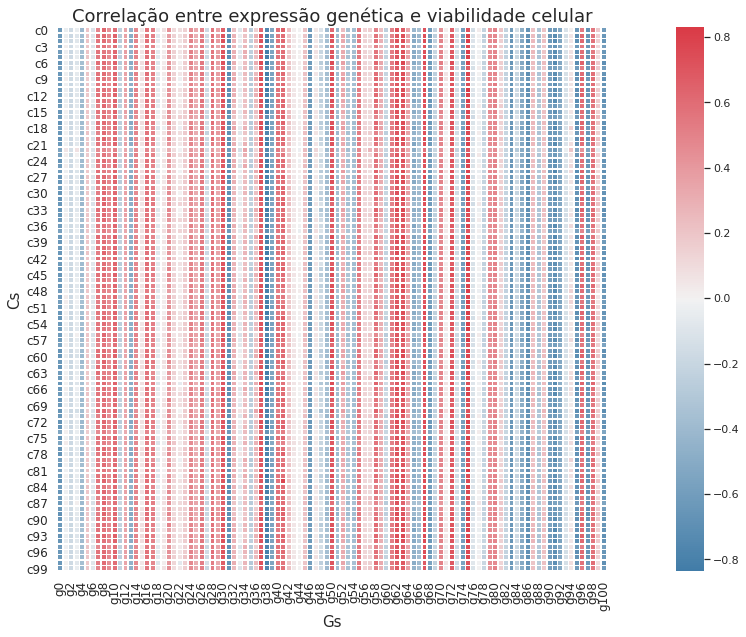

In [ ]:
#heatmap para correlação entre g e c
cmap = sns.diverging_palette(240, 10, as_cmap=True)
fig, ax = plt.subplots(figsize = (25,10))
ax = sns.heatmap(corr_g_c, cmap=cmap, center=0, square=True, linewidths=.5)
  
plt.title('Correlação entre expressão genética e viabilidade celular', fontsize=18)
plt.ylabel('Cs', fontsize=15)
plt.xlabel('Gs', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### **Desafio 07**: Resumo da aula

Aprender o `crosstab` foi excelente e já logo no começo da aula. Colocar sob perspectiva também, através do `sns.lmplot`os efeitos das diferentes drogas e do tratamento já nos permite enxergar o efeito destes compostos nas culturas celulares. Apesar de não se encontrar causalidade, o estudo das correlações, especialmente entre estruturas genéticas e a viabilidade celular já começam a nos dar indicativos quais compostos merecem uma maior atenção.

# Aula 04: Merge e Análise de Resultados

In [ ]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#resultados das colunas
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1])

In [ ]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

### **Desafio 01**: Top 10 dos MOA's

Criação de uma "classificação" baseado no sufixo das 206 variáveis do dataframe de resultados e o rankeamento das 10 ações mais presentes no experimento

In [ ]:
dados_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False).reset_index()
dados_moa.columns = ['MOA', 'quantidade']
dados_moa

,MOA,quantidade
0,nfkb_inhibitor,832
1,proteasome_inhibitor,726
2,cyclooxygenase_inhibitor,435
3,dopamine_receptor_antagonist,424
4,serotonin_receptor_antagonist,404
...,...,...
201,protein_phosphatase_inhibitor,6
202,autotaxin_inhibitor,6
203,diuretic,6
204,erbb2_inhibitor,1


In [ ]:
#início da classificação baseado no sufixo do nome da variável
acao_moa = []
moa_sep = dados_moa['MOA'].str.split('_')
for row in moa_sep:
    acao_moa.append(row[-1])

In [ ]:
#cria nova coluna apenas com a ação do MOA
dados_moa['acao'] = acao_moa
dados_moa.head()

,MOA,quantidade,acao
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist


In [ ]:
#agrupa (somando) a quantidade de observações baseada na ação
top_10 = dados_moa.groupby('acao').agg({'quantidade':'sum'}).sort_values('quantidade', ascending=False).head(10)
top_10 = top_10.reset_index()
top_10

,acao,quantidade
0,inhibitor,9693
1,antagonist,3449
2,agonist,2330
3,blocker,323
4,agent,150
5,activator,115
6,local,80
7,antioxidant,73
8,anti-inflammatory,73
9,immunosuppressant,73


In [ ]:
#cria número de moas ativados pelos experimentos
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
#classifica (variável booleana = True/False) os resultados
dados_resultados['n_moa'] != 0
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [ ]:
 #merge com a base de dados inicial
 dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
 dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [ ]:
#total de culturas que, submetidas ao tratamento, reagiram ou não ao composto
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

### **Desafio 02**: eh_controle

Criação de uma coluna que identifica quando a cultura é exposta ao composto controle

### **Desafio 03**: Colunas de tempo

Criação de três colunas que fazem distinção entre os tempos de análise (24h, 48h, 72h) do experimento

In [ ]:
dados_combinados['eh_controle'] = ((dados_combinados['tratamento'] == 'com_controle').astype('int'))

In [ ]:
dados_combinados['t24'] = ((dados_combinados['tempo'] == 24).astype('int'))
dados_combinados['t48'] = ((dados_combinados['tempo'] == 48).astype('int'))
dados_combinados['t72'] = ((dados_combinados['tempo'] == 72).astype('int'))

In [ ]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,eh_controle,t24,t48,t72
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,0,0,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,0,1,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,0,1,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,0,0,1


### **Desafio 04**: Combinações de dataframe

No pandas é possível juntar bases de dados através do **merge()**: por uma ou mais variáveis identificadoras ele incorpora ao dataframe as demais variáveis; **join()**: baseado no index, estabelecido pelos parâmetros do dataframe, o comando junta uma base de dados a outra; **concat()**: agrupa linhas e colunas de diferentes dataframes; e **compare()**: aponta as semelhanças e diferenças entre dois dataframes (cá entre nós, gera um resultado bem esquisito)

### **Desafio 05**: Análise mais detalhada

 A partir da criação de queries que isolam doses maiores (D2) e menores (D1), e posteriormente elencando os cinco primeiros compostos mais utilizados analisando no g0 e no g75 as diferentes correlações ao longo do tempo.

In [ ]:
#queries com D1 e D2
d1 = dados_combinados.query('dose == "D1"')
d2 = dados_combinados.query('dose == "D2"')

In [ ]:
#top 5 compostos mais usados por df
top5_composto_d1 = d1['composto'].value_counts().index[:5]
top5_composto_d2 = d1['composto'].value_counts().index[:5]

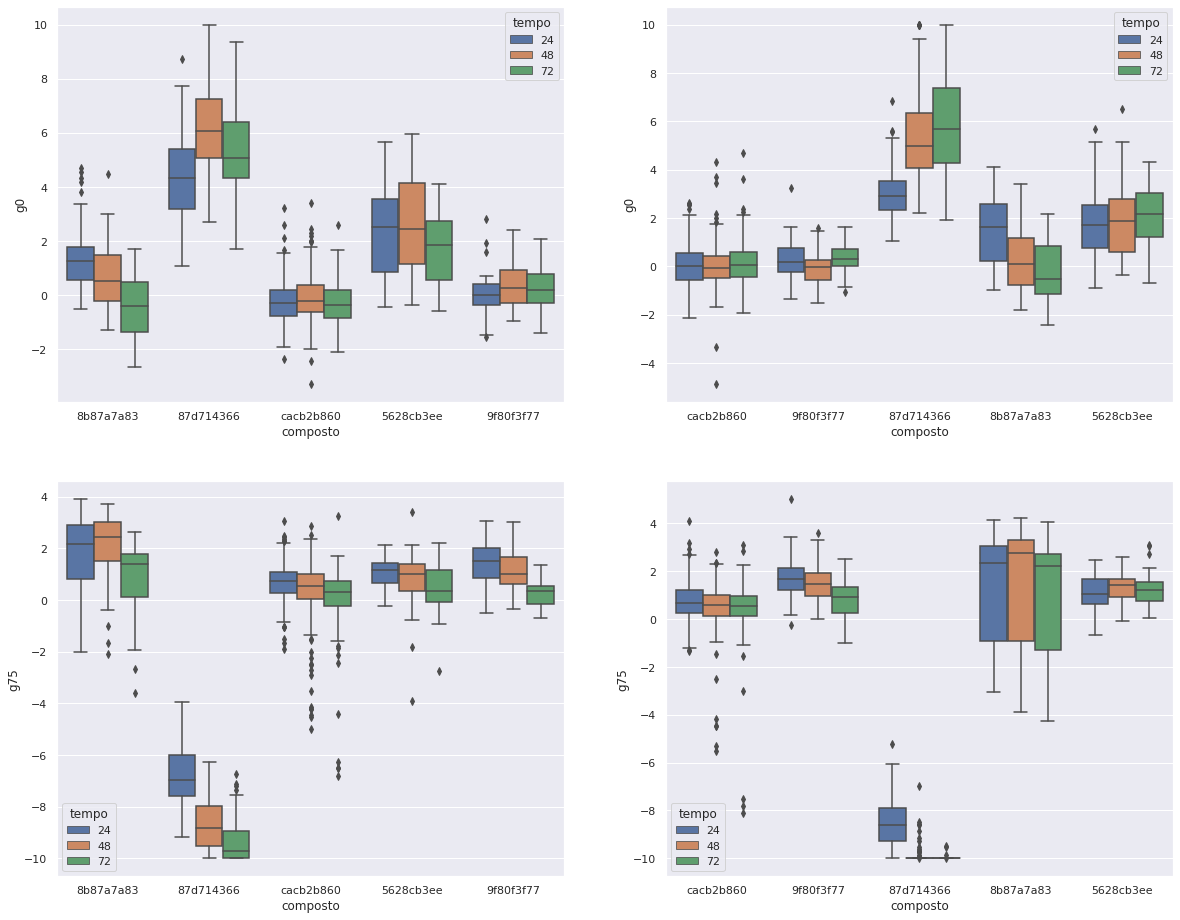

In [ ]:
#gráfico pra analisar g0/g75 (D1 e D2) nos 5 principais compostos e nos diferentes tempos
#lembrando que o composto cacb2b860 é o composto controle
fix, ax = plt.subplots(2,2, figsize=(20,16))
sns.boxplot(data = d1.query('composto in @top5_composto_d1'), y= 'g0', x='composto', hue='tempo', ax=ax[0,0])
sns.boxplot(data = d2.query('composto in @top5_composto_d2'), y= 'g0', x='composto', hue='tempo', ax=ax[0,1])
sns.boxplot(data = d1.query('composto in @top5_composto_d1'), y= 'g75', x='composto', hue='tempo', ax=ax[1,0])
sns.boxplot(data = d2.query('composto in @top5_composto_d2'), y= 'g75', x='composto', hue='tempo', ax=ax[1,1])

### **Desafio 06**: Mecanismos de Ativação (MoA)

A ideia aqui é encontrar alguma observação, que dependendo da configuração ativa ou não um MoA. Inicialmente monta-se 2 queries: uma com composto que ativa o MoA e outra base que mantém apenas os compostos que não ativaram. A ideia do merge é, pelo composto, criar um df com as observações que seguem esse critério de sim e não. Todavia, não existe composto que num experimento ative o mecanismo e noutro, não.

In [ ]:
pd.merge(dados_combinados[['composto','ativo_moa']].query('ativo_moa == True'), 
         dados_combinados[['composto','ativo_moa']].query('ativo_moa == False'), 
         on = 'composto')

,composto,ativo_moa_x,ativo_moa_y


### **Desafio 07**: Mecanismos de Ativação diferentes

Pensando que o desvio padrão é a medida que indica o quanto o resultado se distancia da média, a ideia aqui é mostrar, caso um experimento ative MoA's diferentes a depender do experimento e consequentemente um desvio padrão diferente de zero, a lista dos compostos heterogêneos. Como no Desafio 06, não foram encontrados resultados que fossem diferentes.

In [ ]:
desvpad= list()
for composto in set(dados_combinados['composto']):
    desvpad.append(np.std(dados_combinados.query('composto == @composto')['n_moa']))

print('Valores unicos da lista de desvio padrão são : {}'.format(set(desvpad)))

Valores unicos da lista de desvio padrão são : {0.0}


### **Desafio 08**: Resumo da aula

Após o merge entre os dados e os mecanismos de ativação a gente começa a entender o que aquele composto provoca na cultura celular, além das análises através da construção de variáveis binárias que indicam através de dummies características do experimento, tais como, tratamento, dose e tempo.

# Aula 05: Machine Learning e Sci-kit Learning

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

In [ ]:
#regressão logística
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
#separação da base em treino e teste de acurácia do modelo (~20% teste, 80% treino) 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000) #max_iter funciona para convergência da reg logística
#comando do modelo de treino
modelo_rlogistica.fit(x_treino, y_treino)
#resultado da acurácia do modelo
modelo_rlogistica.score(x_teste, y_teste)

0.6267058576527399

In [ ]:
#modelo baseado na variável binária (+ naive)
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:71: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


0.6067604450976275

In [ ]:
#modelo árvore de decisão
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.6105395758975436

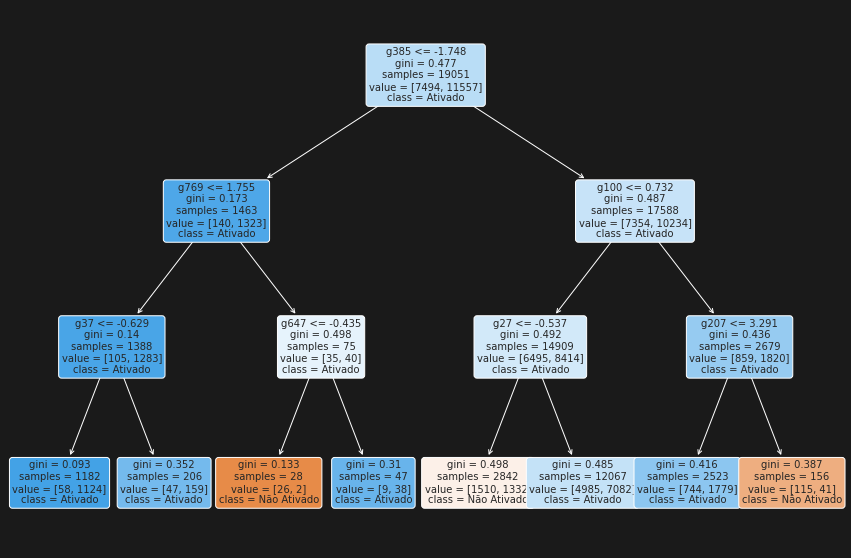

In [ ]:
#gráfico árvore de decisão
fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_arvore,
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x_treino.columns,
               class_names=['Não Ativado', 'Ativado'])
plt.show()

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

teste=[]
treino=[]
for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth = i)
    modelo_arvore.fit(x_treino, y_treino)
    teste.append(modelo_arvore.score(x_teste, y_teste))
    treino.append(modelo_arvore.score(x_treino, y_treino))

In [ ]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6208272097417594,
 0.6204073063195465,
 0.6178878857862692,
 0.6206172580306529,
 0.6206172580306529,
 0.614948561830779,
 0.6122191895863951,
 0.6096997690531177,
 0.5979424732311568,
 0.5998320386311149,
 0.5939533907201344]

In [ ]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6605427536612252,
 0.6707259461445594,
 0.6895176106241142,
 0.7068395359823632,
 0.7294630203138943,
 0.7528738648889822,
 0.7771770510734345,
 0.7989081937956013]

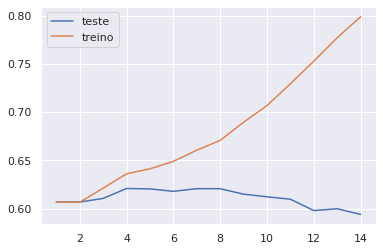

In [ ]:
#visualização do overfeet (por mais que o modelo seja bem treinado, o resultado diminui a acurácia)
sns.lineplot(x=range(1,15), y = teste, label='teste')
sns.lineplot(x=range(1,15), y = treino, label='treino')

In [ ]:
#df transformando em var numéricas (Desafio 4.2)
#dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)

In [ ]:
#árvore aleatória para mitigar o efeito de overfeet, sem setar os parâmetros
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
modelo_randomforest.score(x_teste, y_teste)

0.684232626495906

### **Desafio 01**: Outros modelos e parâmetros

Após criada uma função que já indica o modelo de treino, ele é submetido a regressão [KNeighborsClassifier](https://scikit-learn.org/stable/modules/neighbors.html#classification) que classifica a partir da atribuição de um ponto mais frequente em torno da observação analisada. Posteriormente, outra análise parte dos números de MoA (y) q são colocados no modelo preditivo incluindo outro parâmentro (`C=1.5`) na Regressão Logística.

In [ ]:
def teste_modelo(modelo):
  modelo.fit(x_treino, y_treino)
  print(modelo.score(x_teste, y_teste))

In [ ]:
teste_modelo(KNeighborsClassifier())

0.6216670165861852


In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['n_moa'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000, C=1.5)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.588074742809154

### **Desafio 02**: Estudar sklearn

### **Desafio 03**: Choosing the right estimator

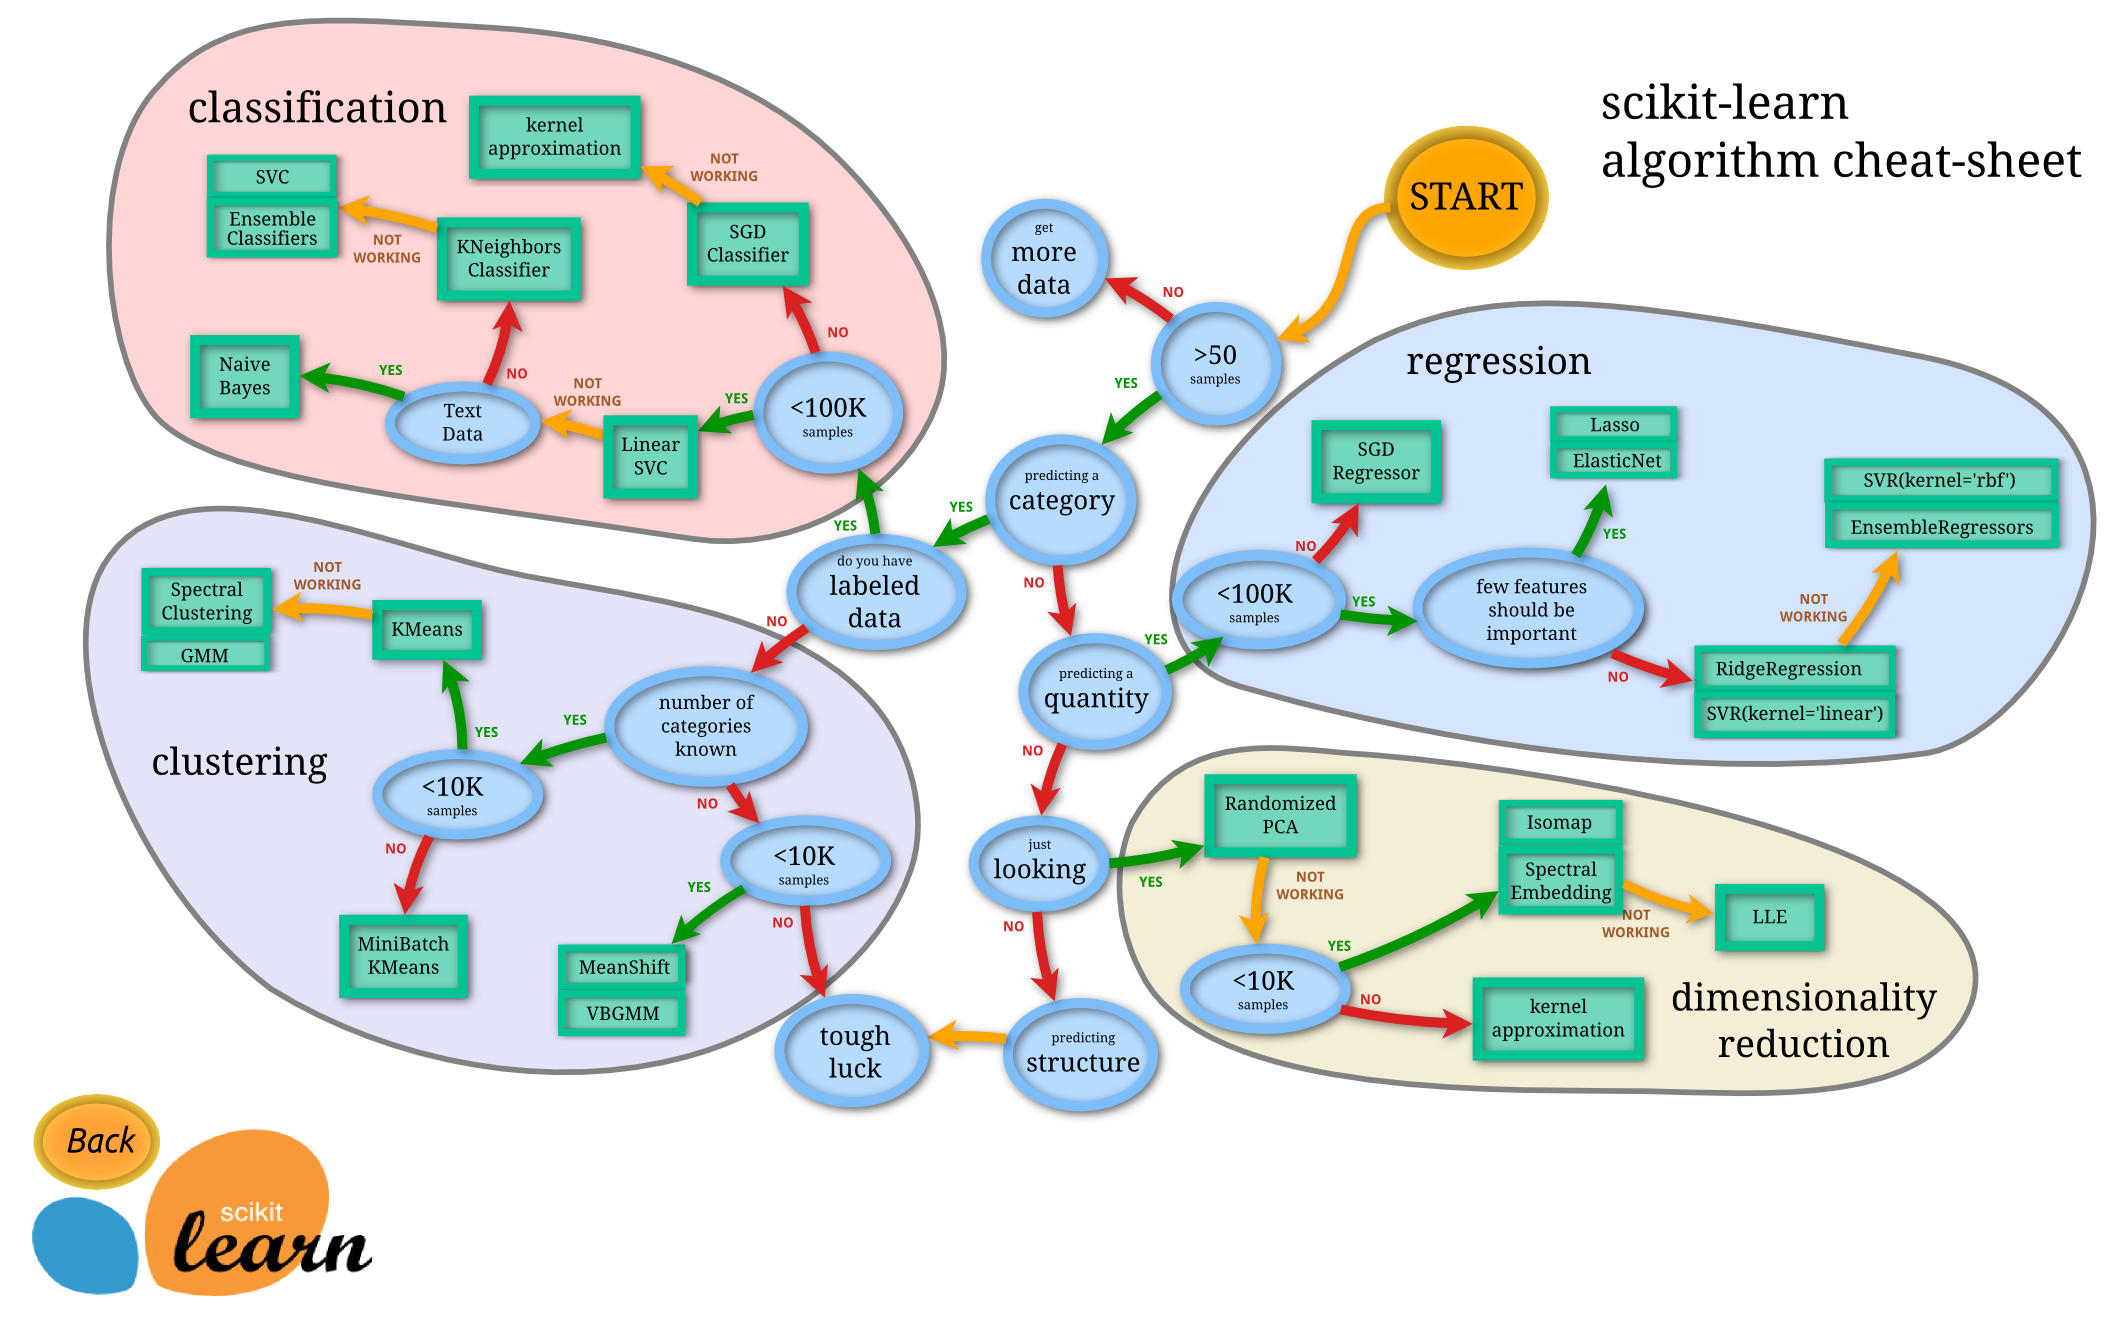

### **Desafio 04**: Outras perguntas e testes

Considerando as dummies criadas em relação ao tempo do experimento e, sabendo que há mais culturas analisadas em 48 horas, por mais que haja um maior número de observações, a acurácia do modelo é menor em relação aos mesmos resultados (sob mesmos parâmetros) dos experimentos de 24 e 72 horas.

In [ ]:
dados_combinados['tempo'].value_counts(normalize = True)

48   0.35
72   0.33
24   0.33
Name: tempo, dtype: float64

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['t24'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000, C=1.5)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.8158723493596473

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['t48'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000, C=1.5)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.7230736930505983

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['t72'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000, C=1.5)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.8282595003149276

### **Desafio 05**: Modelo Preditivo para a droga mais utilizada

Considerando que a o composto cacb2b860 é o mais utilizado e é o composto das culturas de controle, o modelo preditivo com base na variável binária `eh_controle` tem uma acurácia de ~95%. Já consdierando o composto não-placebo, mais utilizado (`87d714366`), a acurácia chega a 100%, logo eu preciso pesquisar mais o porquê disso.

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['eh_controle']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000, C=1.5)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.9542305269787948

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = (dados['composto'] == '87d714366')
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000, C=1.5)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.9997900482888935

### **Desafio 06**: Resumo da aula

Machine Learning é a famosa droga que é a porta pra drogas mais pesadas kkkkk. O aprendizado de máquina confere à pesquisa tantas possibilidades de solucionar problemas no dia a dia, sintetizar em segundos análises profundas que levariam dias para uma equipe de pessoas resolverem. Claro que pensar o modelo requer muita atenção e expertise, como a gente pôde experimentar ao longo da aula e de toda a Imersão, mas faz a gente ser o profissional em T que a Alura vem pregando nos últimos tempos, que é aquele que entende o problema, de diferentes áreas e inclui o desenvolvimento como aliado para a solução de problemas, automatização de processos, visualização dos dados. Bem disse o Gui, é uma busca ilimitada, porque além de uma acurácia excelente  ou razoável, é preciso ver o impacto dos modelos de ML, AI ou DL no mundo real e o resultado empírico que isso traz de fato para o problema.